In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv('A_Titanic-Dataset.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'A_Titanic-Dataset.csv'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data=data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
data['Parch'].unique()
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

#####  Mapping the categerical to numerical columns

In [ ]:
data['Gender']=data['Sex'].map( {'male':1,'female':0}) #### male refers to 1 and female refers to 0
data['Embarked1']=data['Embarked'].map( {'S':1,'C':2,'Q':3})

In [ ]:
data.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Gender,Embarked1
348,1,3,male,3.0,1,1,15.9000,S,1,1.0
108,0,3,male,38.0,0,0,7.8958,S,1,1.0
125,1,3,male,12.0,1,0,11.2417,C,1,2.0
200,0,3,male,28.0,0,0,9.5000,S,1,1.0
385,0,2,male,18.0,0,0,73.5000,S,1,1.0


In [ ]:
data=data.drop(['Sex','Embarked'],axis=1)

In [ ]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Embarked1
0,0,3,22.0,1,0,7.2500,1,1.0
1,1,1,38.0,1,0,71.2833,0,2.0
2,1,3,26.0,0,0,7.9250,0,1.0
3,1,1,35.0,1,0,53.1000,0,1.0
4,0,3,35.0,0,0,8.0500,1,1.0


##### FILLING THE NULL VALUES

In [ ]:
data.isna().sum()

,0
Survived,0
Pclass,0
Age,177
SibSp,0
Parch,0
Fare,0
Gender,0
Embarked1,2


In [ ]:
def missing_values(df,var):
  df[var+'_mean_replaced'] = df[var].fillna(df[var].mean())
  df[var+'_median_replaced'] = df[var].fillna(df[var].median())
  df[var+'_mode_replaced'] = df[var].fillna(df[var].mode())

In [ ]:
missing_values(data,'Age')

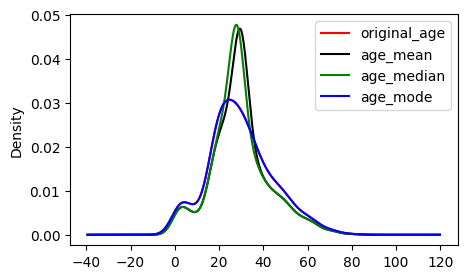

In [ ]:
plt.figure(figsize=(5,3))

data['Age'].plot(kind='kde',color='r',label='original_age')
data['Age_mean_replaced'].plot(kind='kde',color='black',label='age_mean')
data['Age_median_replaced'].plot(kind='kde',color='green',label='age_median')
data['Age_mode_replaced'].plot(kind='kde',color='blue',label='age_mode')

plt.legend(loc=0)

plt.show()

In [ ]:
print(f'Oringinal Age std : {data["Age"].std()}')
print(f'Age Mean std  : {data["Age_mean_replaced"].std()}')
print(f'Age Median std : {data["Age_median_replaced"].std()}')
print(f'Age Mode std: {data["Age_mode_replaced"].std()}')

Oringinal Age std : 14.526497332334044
Age Mean std  : 13.002015226002884
Age Median std : 13.019696550973194
Age Mode std: 14.526497332334044


In [ ]:
#so std of age with mean low soo  we take the mean to fill null values
df=data.drop(['Age_median_replaced','Age_mode_replaced','Age'],axis=1)

In [ ]:
df.head()

,Survived,Pclass,SibSp,Parch,Fare,Gender,Embarked1,Age_mean_replaced
0,0,3,1,0,7.2500,1,1.0,22.0
1,1,1,1,0,71.2833,0,2.0,38.0
2,1,3,0,0,7.9250,0,1.0,26.0
3,1,1,1,0,53.1000,0,1.0,35.0
4,0,3,0,0,8.0500,1,1.0,35.0


In [ ]:
df.isna().sum()

,0
Survived,0
Pclass,0
SibSp,0
Parch,0
Fare,0
Gender,0
Embarked1,2
Age_mean_replaced,0


In [ ]:
df.shape

(891, 8)

In [ ]:
new_df=df.dropna()

In [ ]:
new_df.isna().sum()

,0
Survived,0
Pclass,0
SibSp,0
Parch,0
Fare,0
Gender,0
Embarked1,0
Age_mean_replaced,0


In [ ]:
new_df.shape

(889, 8)

In [ ]:
new_df.head(5)

,Survived,Pclass,SibSp,Parch,Fare,Gender,Embarked1,Age_mean_replaced
0,0,3,1,0,7.2500,1,1.0,22.0
1,1,1,1,0,71.2833,0,2.0,38.0
2,1,3,0,0,7.9250,0,1.0,26.0
3,1,1,1,0,53.1000,0,1.0,35.0
4,0,3,0,0,8.0500,1,1.0,35.0


In [ ]:
x=new_df.iloc[:,1:]
y=new_df.iloc[:,0]

In [ ]:
# standard scaler --we need scale down the values of independent data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x)
result= sc.transform(x)

In [ ]:
scaled_x=pd.DataFrame(data=result)
scaled_x.columns=x.columns
scaled_x.head()

,Pclass,SibSp,Parch,Fare,Gender,Embarked1,Age_mean_replaced
0,0.825209,0.431350,-0.474326,-0.500240,0.735342,-0.569684,-0.590495
1,-1.572211,0.431350,-0.474326,0.788947,-1.359911,1.003139,0.643971
2,0.825209,-0.475199,-0.474326,-0.486650,-1.359911,-0.569684,-0.281878
3,-1.572211,0.431350,-0.474326,0.422861,-1.359911,-0.569684,0.412509
4,0.825209,-0.475199,-0.474326,-0.484133,0.735342,-0.569684,0.412509


In [ ]:
##Split the data for training and testing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,test_size=0.2,random_state=42)

##### we need to train the all models here

In [ ]:
def knn_algo(x_train,y_train,x_test,y_test):
  knn_res = KNeighborsClassifier(n_neighbors=5) # default k_value is 5
  knn_res.fit(x_train,y_train)
  print(f'Training Accuracy : {knn_res.score(x_train,y_train)}')
  print(f'Test Accuracy : {knn_res.score(x_test,y_test)}')

In [ ]:
def naive_bayes_algo(x_train,y_train,x_test,y_test):
  nav_res = GaussianNB()
  nav_res.fit(x_train,y_train)
  print(f'Training Accuracy : {nav_res.score(x_train,y_train)}')
  print(f'Test Accuracy : {nav_res.score(x_test,y_test)}')

In [ ]:
def log_reg_algo(x_train,y_train,x_test,y_test):
  lg_res = LogisticRegression()
  lg_res.fit(x_train,y_train)
  y_test_pred = lg_res.predict(x_test)
  print(f'Training Accuracy : {lg_res.score(x_train,y_train)}')
  print(f'Test Accuracy : {lg_res.score(x_test,y_test)}')

In [ ]:
def dt_algo(x_train,y_train,x_test,y_test):
  dt_res = DecisionTreeClassifier(criterion='entropy')
  dt_res.fit(x_train,y_train)
  y_test_pred = dt_res.predict(x_test)
  print(f'Training Accuracy : {dt_res.score(x_train,y_train)}')
  print(f'Test Accuracy : {dt_res.score(x_test,y_test)}')

In [ ]:
def rf_algo(x_train,y_train,x_test,y_test):
  rf_res = RandomForestClassifier(criterion='entropy',n_estimators=11)
  rf_res.fit(x_train,y_train)
  y_test_pred = rf_res.predict(x_test)
  print(f'Training Accuracy : {rf_res.score(x_train,y_train)}')
  print(f'Test Accuracy : {rf_res.score(x_test,y_test)}')

In [ ]:

print('-----knn-------')
knn_algo(x_train,y_train,x_test,y_test)
print('-----Naive Bayes------')
naive_bayes_algo(x_train,y_train,x_test,y_test)
print('-----Logistic Regression-------')
log_reg_algo(x_train,y_train,x_test,y_test)
print('-----Decision Tree-------')
dt_algo(x_train,y_train,x_test,y_test)
print('-----Random Forest-------')
rf_algo(x_train,y_train,x_test,y_test)


-----knn-------
Training Accuracy : 0.8720112517580872
Test Accuracy : 0.7865168539325843
-----Naive Bayes------
Training Accuracy : 0.7974683544303798
Test Accuracy : 0.7921348314606742
-----Logistic Regression-------
Training Accuracy : 0.7988748241912799
Test Accuracy : 0.7752808988764045
-----Decision Tree-------
Training Accuracy : 0.9859353023909986
Test Accuracy : 0.7471910112359551
-----Random Forest-------
Training Accuracy : 0.9662447257383966
Test Accuracy : 0.7752808988764045


In [ ]:
# naive bayes gives the highest test accurancy
nav_res_final= GaussianNB()
nav_res_final.fit(x_train,y_train)
print(f'Training Accuracy : {nav_res_final.score(x_train,y_train)}')
print(f'Test Accuracy : {nav_res_final.score(x_test,y_test)}')

Training Accuracy : 0.7974683544303798
Test Accuracy : 0.7921348314606742


In [ ]:
# based on column names to give random values

values=[1,1,1,78,1,2,45]
if nav_res_final.predict([values])[0]==1:
  print('alive')
else:
  print('died')

alive


### ANN

In [ ]:
!nvidia-smi

Tue Dec 24 10:19:39 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.activations import relu,sigmoid

In [ ]:
x_train.shape[1]

7

In [ ]:
# define the architecture

model = Sequential()

# input to 1st Hidden layer
model.add(Dense(units=128,kernel_initializer='he_uniform',activation=relu,input_dim=x_train.shape[1]))


# outcome from 1st H.Layer will be given to 2nd H.Layer
model.add(Dense(units=64,kernel_initializer='he_uniform',activation=relu))


# outcome from 2nd H.Layer will be given to 3nd H.Layer
model.add(Dense(units=32,kernel_initializer='he_uniform',activation=relu))

# outcome from 3nd H.Layer will be given to 4th H.Layer
model.add(Dense(units=16,kernel_initializer='he_uniform',activation=relu))


# outcome from 4th H.Layer will be given to 5th H.Layer
model.add(Dense(units=8,kernel_initializer='he_uniform',activation=relu))


# outcome from 5th H.Layer will be given to output layer
model.add(Dense(units=1,kernel_initializer='glorot_uniform',activation=sigmoid))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,033 (47.00 KB)

 Trainable params: 12,033 (47.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# metrics
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])


In [ ]:
x_train.shape

(711, 7)

In [ ]:
# Train the Model
model.fit(x_train,y_train,batch_size=20,validation_split=0.2,epochs=50)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - acc: 0.8888 - loss: 0.2611 - val_acc: 0.8112 - val_loss: 0.8536
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9175 - loss: 0.2247 - val_acc: 0.8042 - val_loss: 0.8318
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8974 - loss: 0.2230 - val_acc: 0.7902 - val_loss: 0.8548
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8903 - loss: 0.2314 - val_acc: 0.8392 - val_loss: 0.8045
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8913 - loss: 0.2600 - val_acc: 0.7832 - val_loss: 0.8216
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9170 - loss: 0.1937 - val_acc: 0.8112 - val_loss: 0.9259
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9271 - loss: 0.2238 - val_acc: 0.8392 - val_loss: 0.8232
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8876 - loss: 0.2482 - val_acc: 0.7972 - val_loss: 0.7756
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8924 - loss:

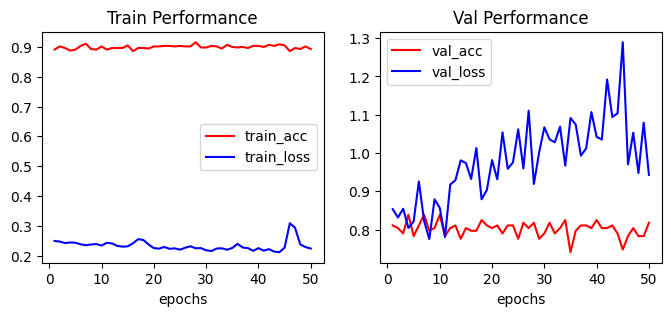

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.title('Train Performance')
plt.xlabel('epochs')
plt.plot(np.arange(1,51),model.history.history['acc'],color='r',label='train_acc')
plt.plot(np.arange(1,51),model.history.history['loss'],color='b',label='train_loss')

plt.legend(loc=0)

plt.subplot(1,2,2)
plt.title('Val Performance')
plt.xlabel('epochs')
plt.plot(np.arange(1,51),model.history.history['val_acc'],color='r',label='val_acc')
plt.plot(np.arange(1,51),model.history.history['val_loss'],color='b',label='val_loss')


plt.legend(loc=0)

plt.show()

In [ ]:

x_test

,Pclass,SibSp,Parch,Fare,Gender,Embarked1,Age_mean_replaced
280,0.825209,-0.475199,-0.474326,-0.488075,0.735342,-0.569684,-0.127570
434,-1.572211,0.431350,2.006119,1.769763,-1.359911,-0.569684,-1.207728
39,0.825209,0.431350,-0.474326,-0.419875,-1.359911,1.003139,-1.207728
417,-0.373501,-0.475199,-0.474326,-0.384475,0.735342,-0.569684,0.026738
584,-1.572211,-0.475199,2.006119,0.957394,-1.359911,-0.569684,-0.899111
...,...,...,...,...,...,...,...
432,0.825209,-0.475199,-0.474326,-0.502756,0.735342,-0.569684,-0.976266
806,0.825209,-0.475199,-0.474326,-0.489670,-1.359911,-0.569684,-0.899111
25,0.825209,0.431350,5.726787,-0.014278,-1.359911,-0.569684,0.643971
84,0.825209,2.244449,-0.474326,-0.327095,-1.359911,-0.569684,0.258200


In [ ]:
# Testing the Data
c = []
for i in range(7):
  c.append(x_test.iloc[0,:][i])
c

[0.8252086287077022,
 -0.4751990812099552,
 -0.4743258521037861,
 -0.4880753554061005,
 0.7353420312659096,
 -0.5696840153107805,
 -0.12757020150758383]

In [ ]:
c = np.array(c)
c = c.reshape(1,-1)
model.predict(c)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


array([[0.0658379]], dtype=float32)

In [ ]:
if model.predict(c)[0]==1:
  print('Alive')
else:
  print('died')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
died


In [ ]:
values1=np.array(values)
values1=values1.reshape(1,-1)
if model.predict(values1)[0]==1:
  print('Alive')
else:
  print('Died')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Alive


In [ ]:
outcome = model.predict(x_test)
d = []

for i in outcome:
  if i[0]==1:
    d.append(1)
  else:
    d.append(0)
d

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step


[0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
accuracy_score(y_test,d)

0.7078651685393258

In [ ]:
confusion_matrix(y_test,d)

array([[106,   3],
       [ 49,  20]])

In [ ]:
print(classification_report(y_test,d))

              precision    recall  f1-score   support

           0       0.68      0.97      0.80       109
           1       0.87      0.29      0.43        69

    accuracy                           0.71       178
   macro avg       0.78      0.63      0.62       178
weighted avg       0.76      0.71      0.66       178

